# Supporting Jupyter Notebook for "Segmented K-Space Blipped-Controlled Aliasing in Parallel Imaging (Skipped-CAIPI) for High Spatiotemporal Resolution Echo Planar Imaging"

Provisionally accepted by Magnetic Resonance in Medicine, 2020

Rüdiger Stirnberg (1), Tony Stöcker (1,2)

1. German Center for Neurodegenerative Diseases (DZNE), Bonn, Germany
2. Department of Physics and Astronomy, University of Bonn, Bonn, Germany

In [1]:
# Some plotting functions of this notebook require python 3
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import matplotlib.gridspec as gridspec
from skippedcaipi import * # get_zblips, get_zblipcycle and plotting functions

# CUSTOMIZE VISUALIZATION:
# Font size
FS = 11; rcParams.update({'font.size': FS})
# Elementary sampling cell repetitions along y
# Increase, if you want or have to see more of the trajectory (e.g. for large S).
# A minimum of 3 is recommended.
SR = 3

# Enter CAIPI pattern parameters and segmentation factor

# $S\cdot {R_y\times R_z}_{\Delta z}$

In [30]:
Ry=1 # Undersampling factor along y (primary phase encode direction, w.l.o.g.)
Rz=8 # Undersampling factor along z (slice direction, w.l.o.g.)
Dz=2 # CAIPI shift along z
S=2  # Segmentation factor

# Blipped-CAIPI trajectory $(S=1)$ associated to specified CAIPI pattern

(Eq. A1) The blipped-CAIPI z-blip amplitudes are: 2 and 6.
(Eq. A2) The z-blip sequence repeats every 4 echoes.


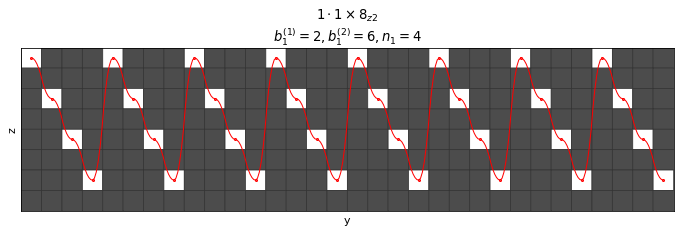

In [31]:
trajectory_color = [1.0,0,0]
if Dz==0:
    print("This bipped-CAIPI trajectory is identical to traditional single-shot EPI, because CAIPI shift = 0.")
    trajectory_color = [0,0,1.0]
b1 = get_zblips(Ry, Rz, Dz, S=1)
print("(Eq. A1) The blipped-CAIPI z-blip amplitudes are: %d and %d." % (b1))
n1 = get_zblipcycle(Rz, bmin=np.min(b1))
print("(Eq. A2) The z-blip sequence repeats every %d echoes." % (n1))

plt.figure(figsize = (4*SR,3))
_, notation = plot_skipped_caipi(Ry, Rz, Dz, 1, color=trajectory_color, repetitions=SR)
plt.title(notation + '\n' + r'$b_1^{(1)}=%d, b_1^{(2)}=%d, n_1=%d$' % (b1[0], b1[1], n1)); plt.xlabel('y'); plt.ylabel('z'); plt.show()

# Skipped-CAIPI trajectory with specified $S$

(Eq. A1) The skipped-CAIPI z-blip amplitudes with S=2 are 4 and 4.
(Eq. A2) The z-blip sequence repeats every 2 echoes.


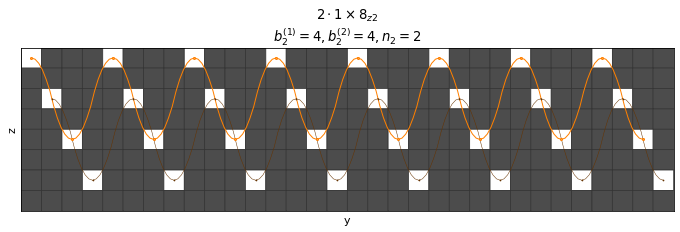

In [32]:
if Dz==0:
    if S==1:
        print("This skipped-CAIPI trajectory is identical to traditional single-shot EPI, because CAIPI shift = 0 and S=1.")
    else:
        print("This skipped-CAIPI trajectory is identical to traditional segmented EPI, because CAIPI shift = 0.")
    trajectory_color = [0,0,1.0]
elif S==1:
    print("This skipped-CAIPI trajectory is identical to the blipped-CAIPI trajectory, because S=1.")
    trajectory_color = [1.0,0,0]
elif S==n1:
    print("This skipped-CAIPI trajectory is identical to the shot-selective trajectory, because S=n1.")
    trajectory_color = [0.8,0.8,0]
else:
    trajectory_color=[1.0,0.5,0]
    
bS = get_zblips(Ry, Rz, Dz, S=S)
print("(Eq. A1) The skipped-CAIPI z-blip amplitudes with S=%d are %d and %d." % (S, bS[0], bS[1]))
nS = get_zblipcycle(Rz, bmin=np.min(get_zblips(Ry, Rz, Dz, S=S)))
print("(Eq. A2) The z-blip sequence repeats every %d echoes." % (nS))

plt.figure(figsize = (4*SR,3))
_, notation = plot_skipped_caipi(Ry, Rz, Dz, S, color=trajectory_color, repetitions=SR, bAllShots=True)
plt.title(notation + '\n' + r'$b_%d^{(1)}=%d, b_%d^{(2)}=%d, n_{%d}=%d$' % (S, bS[0], S, bS[1], S,nS)); plt.xlabel('y'); plt.ylabel('z'); plt.show()

# All unique EPI trajectories associated to specified CAIPI pattern

Reproduce Supporting Information Figure S2 considering both signs for specified CAIPI shift.

## Loop over segmentation factors $S \in [1, n_1]$


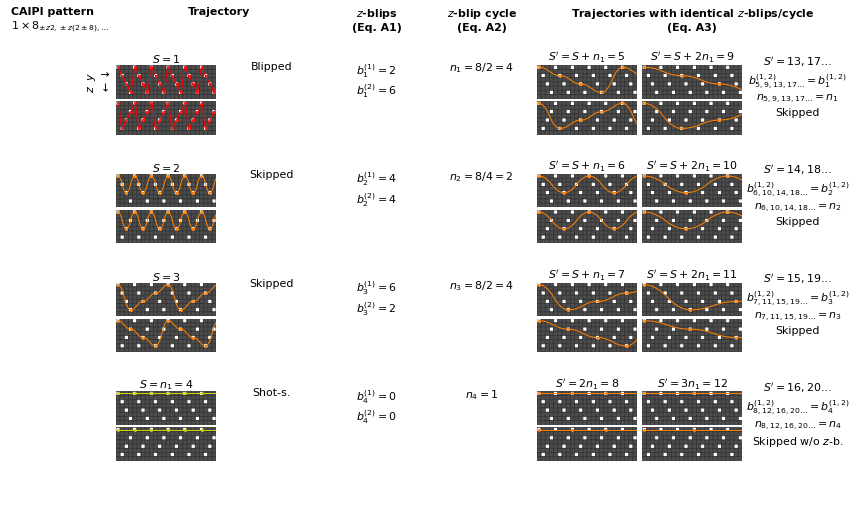

In [33]:
# Both CAIPI shift signs are considered below
Dz = np.abs(Dz)

# Prepare tabular plot      
fig = plt.figure(figsize = (5*SR,(2*n1+1)))
gs = gridspec.GridSpec(nrows=2*n1+1, ncols=8, wspace=0.05, hspace=0.0)
ax = []

# Header
ax += [fig.add_subplot(gs[0:1,0:1])]
ax[-1].text(0,1,'CAIPI pattern\n'+r'${%d\times %d}_{\pm z%d,\pm z(%d\pm%d),\dots}$' % (Ry, Rz, Dz, Dz,Rz),ha='left', va='top', fontweight='bold')
ax += [fig.add_subplot(gs[0:1,1:3])]
ax[-1].text(0.5,1,'Trajectory',ha='center', va='top', fontweight='bold')
ax += [fig.add_subplot(gs[0:1,3:4])]
ax[-1].text(0.5,1,r'$z$-blips'+'\n(Eq. A1)',ha='center', va='top', fontweight='bold')
ax += [fig.add_subplot(gs[0:1,4:5])]
ax[-1].text(0.5,1,r'$z$-blip cycle'+'\n(Eq. A2)',ha='center', va='top', fontweight='bold')
ax += [fig.add_subplot(gs[0:1,5:])]
ax[-1].text(0.5,1,r'Trajectories with identical $z$-blips/cycle'+'\n(Eq. A3)',ha='center', va='top', fontweight='bold')

def adjust_plots(ax):
    ax[0].set_xlim([0,SR*Ry*Rz])
    ax[1].set_xlim([0,SR*Ry*Rz])
    pos = ax[0].get_position()
    ax[0].set_position([pos.x0, pos.y0+pos.height/5, pos.width, pos.height])
    ax[1].set_position([pos.x0, pos.y0-(pos.height*4/5)*1.1, pos.width, pos.height])

# LOOP OVER SEGMENTATION FACTORS
currow = 1
for s in range(1,n1+1):
    #Eq. (A1) and (A2)
    bS = get_zblips(Ry, Rz, Dz, s)
    bmin = np.min(bS)
    ns = get_zblipcycle(Rz, bmin)

    title = r'$S=%d$'%(s)
    if Dz==0:
        trajectory_color=[0,0,1]
        trajectory_type = 'w/o CAIPI'
        fontcolor='b'
    elif s==1:
        trajectory_color=[1,0,0]
        trajectory_type = 'Blipped'
        fontcolor='r'
    elif s==n1:
        trajectory_color=[0.8,0.8,0]
        trajectory_type = 'Shot-s.'
        title = r'$S=n_1=%d$'%(s)
    else:
        trajectory_color=[1.0, 0.5, 0]
        trajectory_type = 'Skipped'
        
    if bmin==0:
        nslabel = r'$n_{%s}=%d$'% (s,ns)
    elif np.mod(Rz,bmin)==0:
        nslabel = r'$n_{%s}=%d/%d=%d$'% (s,Rz,bmin,ns)
    else:
        nslabel = r'$n_{%s}=%d$'% (s,Rz)
        
    fontcolor='k'
    
    # Plot trajectories for segmentation factor, S, with positive and negative CAIPI shift (identical z-blip magnitudes):
    ax += [fig.add_subplot(gs[currow:currow+1,1:2])]
    ax += [fig.add_subplot(gs[currow+1:currow+2,1:2])]
    plot_skipped_caipi(Ry, Rz, Dz, s, ax=ax[-2], color=trajectory_color, repetitions=SR*2, bAllShots=False)
    plot_skipped_caipi(Ry, Rz, -Dz, s, ax=ax[-1], color=trajectory_color, repetitions=SR*2, bAllShots=False)
    adjust_plots(ax[-2:])  
    ax[-2].set_title(title, fontsize=FS, pad=0, color=fontcolor)
    if s==1:
        ax[-2].set_ylabel(r'$z\ \ y$' + '\n' + r'$\leftarrow \downarrow$')
    if Dz==0:
        trajectory_color=[0, 0, 1.0]
    else:
        trajectory_color=[1.0, 0.5, 0]

    # Print trajectory type
    ax += [fig.add_subplot(gs[currow:currow+2,2:3])]
    ax[-1].text(0.5,1,trajectory_type, ha='center', va='top', color=fontcolor)

    # Print z-blips and z-blip cycle
    ax += [fig.add_subplot(gs[currow:currow+2,3:4])]
    text = r'$b_{%d}^{(1)}={%d}$' % (s,bS[0]) + '\n' + r'$b_{%d}^{(2)}={%d}$' % (s,bS[1])
    ax[-1].text(0.5,1,text, ha='center', va='top', fontsize=FS, color=fontcolor)
    ax += [fig.add_subplot(gs[currow:currow+2,4:5])]
    ax[-1].text(0.5,1, nslabel, color=fontcolor, ha='center', va='top', fontsize=FS)

    # Plot trajectories for segmentation factor, S' = S + n1, leading to identical z-blips:
    ax += [fig.add_subplot(gs[currow:currow+1,5:6])]
    ax += [fig.add_subplot(gs[currow+1:currow+2,5:6])]
    plot_skipped_caipi(Ry, Rz, Dz, s+n1, ax=ax[-2], color=trajectory_color, repetitions=SR*2, bAllShots=False)
    plot_skipped_caipi(Ry, Rz, -Dz, s+n1, ax=ax[-1], color=trajectory_color, repetitions=SR*2, bAllShots=False)
    adjust_plots(ax[-2:])  
    
    # Plot trajectories for segmentation factor, S' = S + 2*n1, leading to identical z-blips
    ax += [fig.add_subplot(gs[currow:currow+1,6:7])]
    ax += [fig.add_subplot(gs[currow+1:currow+2,6:7])]
    plot_skipped_caipi(Ry, Rz, Dz, s+2*n1, ax=ax[-2], color=trajectory_color, repetitions=SR*2, bAllShots=False)
    plot_skipped_caipi(Ry, Rz, -Dz, s+2*n1, ax=ax[-1], color=trajectory_color, repetitions=SR*2, bAllShots=False)
    adjust_plots(ax[-2:])

    # Print corresponding z-blips, z-blip cycles and Skipped-CAIPI type (with or without z-blips)
    if Dz==0:
        ax[-4].set_title(r'$S^\prime=2n_1=%d$'%(s+n1), fontsize=FS, pad=0)
        ax[-2].set_title(r'$S^\prime=3n_1=%d$'%(s+2*n1), fontsize=FS, pad=0)
        scheme_type = r'w/o CAIPI'
    elif s==n1:
        ax[-4].set_title(r'$S^\prime=2n_1=%d$'%(s+n1), fontsize=FS, pad=0)
        ax[-2].set_title(r'$S^\prime=3n_1=%d$'%(s+2*n1), fontsize=FS, pad=0)
        scheme_type = r'Skipped w/o $z$-b.'
    else:
        ax[-4].set_title(r'$S^\prime=S+n_1=%d$'%(s+n1), fontsize=FS, pad=0)
        ax[-2].set_title(r'$S^\prime=S+2n_1=%d$'%(s+2*n1), fontsize=FS, pad=0)
        scheme_type = 'Skipped'
    ax += [fig.add_subplot(gs[currow:currow+2,7:])]
    ax[-1].text(0.5,1.0, r'$S^\prime=%d,%d\dots$'%(s+3*n1,s+4*n1), ha='center', va='center', fontsize=FS)
    ax[-1].text(0.5,0.9,  r'$b_{%d,%d,%d,%d\dots}^{(1,2)}=b_{%d}^{(1,2)}$'%(s+n1,s+2*n1,s+3*n1,s+4*n1,s) + '\n'
                        + r'$n_{%d,%d,%d,%d\dots}=n_{%d}$'%(s+n1,s+2*n1,s+3*n1,s+4*n1,s) + '\n'
                        + scheme_type, ha='center', va='top', fontsize=FS)

    # Go to next row of the table for the next S -> S+1
    currow+=2

for a in ax:
    a.set_xticks([])
    a.set_yticks([])
    for spine in a.spines.values():
        spine.set_color('none')
        
plt.show()


# Recap Appendix

## $Z$-blips (Eq. A1):

$b_{S}^{(1)} = (S\cdot \Delta z) \text{ mod } R_z\\
b_{S}^{(2)} = (R_z - b_{S}^{(1)}) \text{ mod } R_z\\
b_{S,min} =\min\left(b_{S}^{(1)}, b_{S}^{(2)}\right)$


## $Z$-blip cycle (Eq. A2):
$
n_S = \begin{cases}
1 &, \text{if } b_{S,min}=b_{S}^{(1)}=b_{S}^{(2)}=0\\
R_z/b_{S,min}&, \text{if } R_z \text{ mod } b_{S,min} = 0\\
R_z&, \text{else}
\end{cases}
$

## Segmentation factors leading to identical z-blips/cycle (Eq. A3):
$S^\prime=S+m\cdot n_1$

where $m\in \mathbb{Z}$.